# Reproduce Figure 9.3

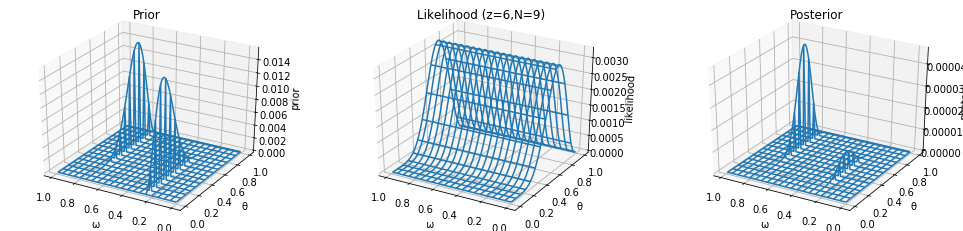

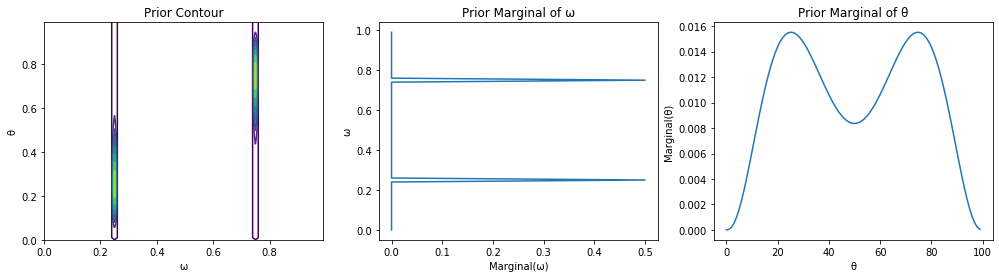

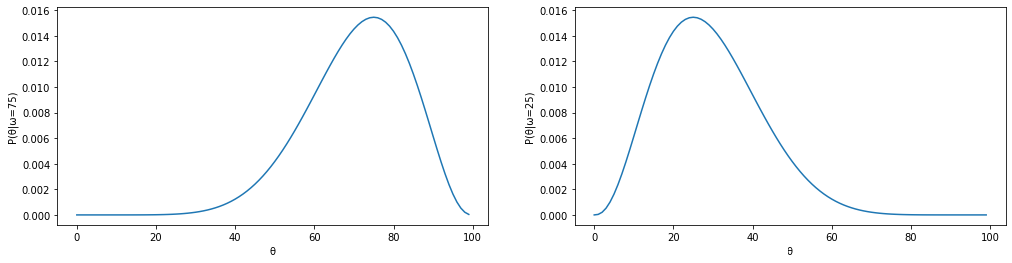

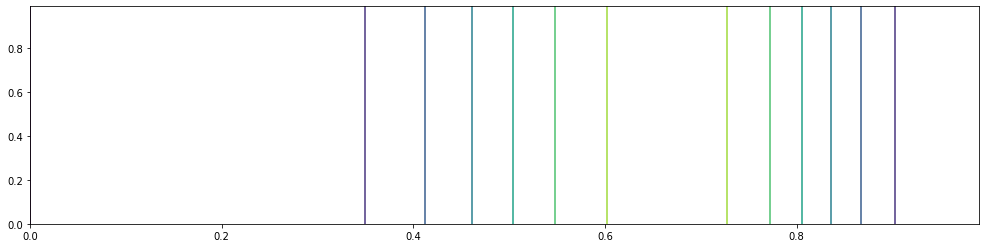

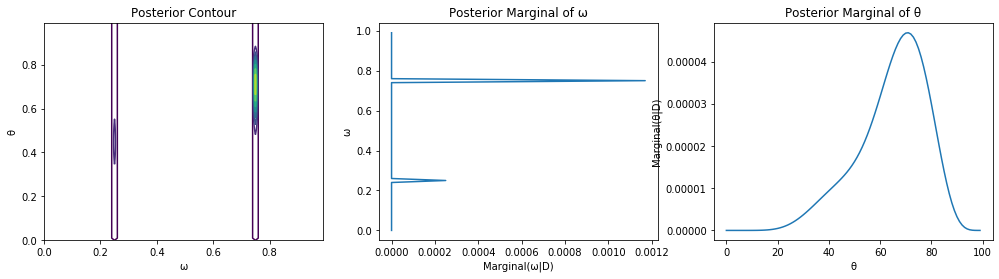

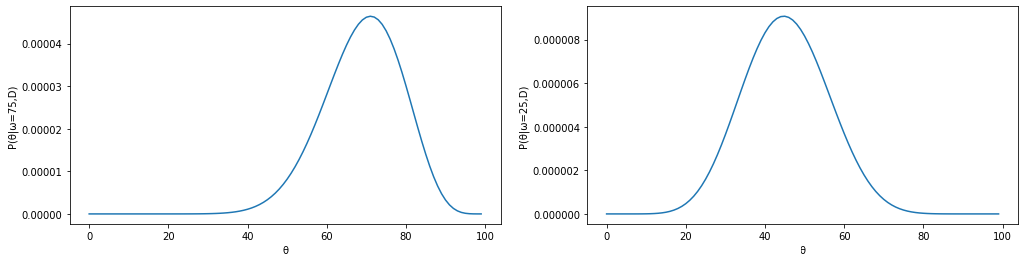

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import beta
from functools import reduce

def prior(ω, θ):
    κ = 12
    
    a25 = .25*(κ-2)+1
    b25 = (1-.25)*(κ-2)+1
    n25 = reduce(lambda x,y: x+y, [beta(a25,b25).pdf(x)*beta(1,1).pdf(x) for x in np.arange(0,1,.01)])

    a75 = .75*(κ-2)+1
    b75 = (1-.75)*(κ-2)+1
    n75 = reduce(lambda x,y: x+y, [beta(a75,b75).pdf(x)*beta(1,1).pdf(x) for x in np.arange(0,1,.01)])

    nor = n25+n75
    
    def g(i,j):
        result = 0
        if (i==.25) or (i==.75):
            a = i*(κ-2)+1
            b = (1-i)*(κ-2)+1
            result = (beta(a,b).pdf(j)*beta(1,1).pdf(i)) / nor
        return result
    
    return np.array([[ g(ω[i][j],θ[i][j]) for j in range(0,len(ω))] for i in range(0,len(θ))])

def likelihood(ω, θ):
    z=6
    N=9
    bernoulli = lambda theta,z,N: theta**(z) * (1-theta)**(N-z)    
    return np.array([[ bernoulli(θ[i][j],z,N) for j in range(0,len(ω))] for i in range(0,len(θ))])


x = np.arange(0, 1, .01)
y = np.arange(0, 1, .01)

X, Y = np.meshgrid(x,y)
priorZ = prior(X,Y)
likelihoodZ = likelihood(X,Y)
posteriorZ = likelihoodZ*priorZ

fig = plt.figure(figsize=(17,4))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_wireframe(X, Y, priorZ, rcount=15, ccount=20)
#ax.contour3D(X, Y, priorZ, 70, cmap='viridis')
ax.set_xlabel('ω')
ax.set_ylabel('θ')
ax.set_zlabel('prior')
ax.invert_xaxis()  # To show it like in the book
ax.set_title('Prior')

ax1 = fig.add_subplot(1, 3, 2, projection='3d')
ax1.plot_wireframe(X, Y, likelihoodZ, rcount=15, ccount=20)
#ax1.contour3D(X, Y, likelihoodZ, 70, cmap='viridis')
ax1.set_xlabel('ω')
ax1.set_ylabel('θ')
ax1.set_zlabel('likelihood')
ax1.invert_xaxis()  # To show it like in the book
ax1.set_title('Likelihood (z=6,N=9)')

ax2 = fig.add_subplot(1, 3, 3, projection='3d')
ax2.plot_wireframe(X, Y, posteriorZ, rcount=15, ccount=20)
#ax2.contour3D(X, Y, posteriorZ, 70, cmap='viridis')
ax2.set_xlabel('ω')
ax2.set_ylabel('θ')
ax2.set_zlabel('posterior')
ax2.invert_xaxis()  # To show it like in the book
ax2.set_title('Posterior')

fig = plt.figure(figsize=(17,4))

# Prior Contour
ax3 = fig.add_subplot(1, 3, 1)
ax3.set_xlabel('ω')
ax3.set_ylabel('θ')
ax3.set_title('Prior Contour')
ax3.contour(x,y,priorZ)

# Prior Marginal ω
ax4 = fig.add_subplot(1,3,2)
ax4.set_xlabel('Marginal(ω)')
ax4.set_ylabel('ω')
ax4.set_title('Prior Marginal of ω')
ax4.plot(np.sum(priorZ,axis=0),x)

# Prior Marginal θ
ax5 = fig.add_subplot(1,3,3)
ax5.set_xlabel('θ')
ax5.set_ylabel('Marginal(θ)')
ax5.set_title('Prior Marginal of θ')
ax5.plot(np.sum(priorZ,axis=1))

fig = plt.figure(figsize=(17,4))

ax6 = fig.add_subplot(1,2,1)
ax6.set_xlabel('θ')
ax6.set_ylabel('P(θ|ω=75)')
ax6.plot(prior(Y,X)[75])

ax7 = fig.add_subplot(1,2,2)
ax7.set_xlabel('θ')
ax7.set_ylabel('P(θ|ω=25)')
ax7.plot(prior(Y,X)[25])


fig = plt.figure(figsize=(17,4))

# Likelihood
ax8 = fig.add_subplot(1,1,1)
ax8.contour(y,x,likelihood(Y,X))


fig = plt.figure(figsize=(17,4))

# Posterior Contour
ax9 = fig.add_subplot(1,3,1)
ax9.set_xlabel('ω')
ax9.set_ylabel('θ')
ax9.set_title('Posterior Contour')
ax9.contour(x,y,posteriorZ)

# Posterior Marginal ω
ax10 = fig.add_subplot(1,3,2)
ax10.set_xlabel('Marginal(ω|D)')
ax10.set_ylabel('ω')
ax10.set_title('Posterior Marginal of ω')
ax10.plot(np.sum(posteriorZ,axis=0),x)

# Posterior Marginal θ
ax11 = fig.add_subplot(1,3,3)
ax11.set_xlabel('θ')
ax11.set_ylabel('Marginal(θ|D)')
ax11.set_title('Posterior Marginal of θ')
ax11.plot(np.sum(posteriorZ,axis=1))

fig = plt.figure(figsize=(17,4))

ax6 = fig.add_subplot(1,2,1)
ax6.set_xlabel('θ')
ax6.set_ylabel('P(θ|ω=75,D)')
ax6.plot((prior(Y,X)*likelihood(Y,X))[75])

ax7 = fig.add_subplot(1,2,2)
ax7.set_xlabel('θ')
ax7.set_ylabel('P(θ|ω=25,D)')
ax7.plot((prior(Y,X)*likelihood(Y,X))[25])

plt.show()